In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\pyth

In [6]:
import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
from keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2

import tensorflow as tf


np.random.seed(1)

In [7]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

tf.test.gpu_device_name()

''

In [8]:
train_dir = "F:/Train"
valid_dir = "F:/Test"

img_width, img_height = 224, 224

In [9]:
conv_base = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height, 3),
)


conv_base.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
51879936/51877672 [==============================] - 215s 4us/step
Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
co

In [10]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1664)) 
    labels = np.zeros(shape=(sample_count,12))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
 
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 34387) 
validation_features, validation_labels = extract_features(valid_dir, 8597)

Found 34387 images belonging to 12 classes.
Found 8597 images belonging to 12 classes.


In [11]:
train_features.shape

(34387, 7, 7, 1664)

In [12]:
validation_features.shape

(8597, 7, 7, 1664)

In [13]:
epochs = 100

model = Sequential()

# Fully Connected Layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7,7,1664)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 5, 32)          479264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                396       
Total params: 483,788


In [16]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  


from keras.optimizers import Adam
from keras.optimizers import SGD
optimizer = SGD(lr=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Train on 34387 samples, validate on 8597 samples
Epoch 1/100
34387/34387 [==============================] - 38s 1ms/step - loss: 0.8130 - acc: 0.7959 - val_loss: 0.9091 - val_acc: 0.7932

Epoch 00001: val_acc improved from -inf to 0.79318, saving model to model-001-0.795853-0.793184.h5
Epoch 2/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.8055 - acc: 0.7960 - val_loss: 0.9172 - val_acc: 0.7923

Epoch 00002: val_acc did not improve from 0.79318
Epoch 3/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.8025 - acc: 0.7961 - val_loss: 0.9137 - val_acc: 0.7933

Epoch 00003: val_acc improved from 0.79318 to 0.79330, saving model to model-003-0.796144-0.793300.h5
Epoch 4/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.8018 - acc: 0.7961 - val_loss: 0.9197 - val_acc: 0.7934

Epoch 00004: val_acc improved from 0.79330 to 0.79342, saving model to model-004-0.796057-0.793416.h5
Epoch 5/100
34387/34387 [=================

34387/34387 [==============================] - 37s 1ms/step - loss: 0.7587 - acc: 0.7998 - val_loss: 0.9760 - val_acc: 0.7916

Epoch 00043: val_acc did not improve from 0.79353
Epoch 44/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7597 - acc: 0.7993 - val_loss: 0.9804 - val_acc: 0.7924

Epoch 00044: val_acc did not improve from 0.79353
Epoch 45/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7584 - acc: 0.7987 - val_loss: 0.9747 - val_acc: 0.7911

Epoch 00045: val_acc did not improve from 0.79353
Epoch 46/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.7583 - acc: 0.7999 - val_loss: 0.9792 - val_acc: 0.7906

Epoch 00046: val_acc did not improve from 0.79353
Epoch 47/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7567 - acc: 0.8001 - val_loss: 0.9751 - val_acc: 0.7931

Epoch 00047: val_acc did not improve from 0.79353
Epoch 48/100
34387/34387 [==============================] - 37s

34387/34387 [==============================] - 36s 1ms/step - loss: 0.7244 - acc: 0.8026 - val_loss: 1.0282 - val_acc: 0.7881

Epoch 00086: val_acc did not improve from 0.79353
Epoch 87/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.7247 - acc: 0.8023 - val_loss: 1.0444 - val_acc: 0.7852

Epoch 00087: val_acc did not improve from 0.79353
Epoch 88/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7225 - acc: 0.8037 - val_loss: 1.0418 - val_acc: 0.7905

Epoch 00088: val_acc did not improve from 0.79353
Epoch 89/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7240 - acc: 0.8023 - val_loss: 1.0257 - val_acc: 0.7897

Epoch 00089: val_acc did not improve from 0.79353
Epoch 90/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7193 - acc: 0.8033 - val_loss: 1.0586 - val_acc: 0.7913

Epoch 00090: val_acc did not improve from 0.79353
Epoch 91/100
34387/34387 [==============================] - 37s

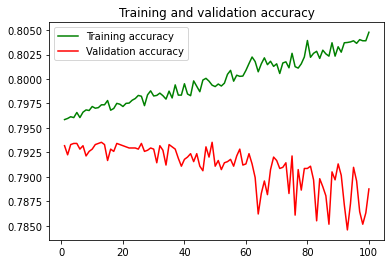

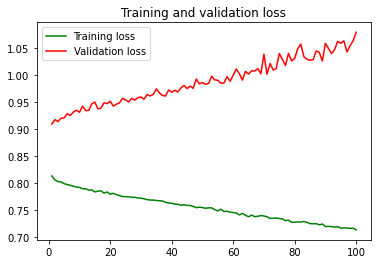

In [17]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [18]:
prediction = model.predict(validation_features)

In [19]:
prediction.shape

(8597, 12)

In [20]:
pred = np.argmax(prediction,axis=1)
validation_labels = np.argmax(validation_labels,axis=1)

In [22]:
print(classification_report(validation_labels,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.00      0.00      0.00       147
           2       0.22      0.01      0.02       679
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        95
           8       0.79      0.99      0.88      6825
           9       0.00      0.00      0.00        79
          10       0.15      0.02      0.04       352
          11       0.00      0.00      0.00        59

    accuracy                           0.79      8597
   macro avg       0.10      0.09      0.08      8597
weighted avg       0.65      0.79      0.70      8597



C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
